<a href="https://colab.research.google.com/github/shajuchinchu/python/blob/main/RNN_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical


In [2]:
# Load data from CSV
data = pd.read_csv('/content/updated_dataset.csv')

# Separate features and labels
X = data.drop(columns=['Label'])  # Assuming 'Label' is the column with the polymer types
y = data['Label']

In [3]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [4]:
y_categorical

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [5]:
# Reshape data for GRU input (samples, timesteps, features)
X_reshaped = np.expand_dims(X, axis=2)  # Add dimension for "timesteps" as required by RNNs


In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input

# Define the model
model = Sequential()
model.add(Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2])))  # Use Input layer
model.add(GRU(units=64, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(units=32))
model.add(Dropout(0.3))
model.add(Dense(units=y_categorical.shape[1], activation='softmax'))  # Number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 51s 48ms/step - accuracy: 0.6967 - loss: 0.7268 - val_accuracy: 0.8965 - val_loss: 0.2963
Epoch 2/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.8970 - loss: 0.2940 - val_accuracy: 0.9257 - val_loss: 0.2244
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.9248 - loss: 0.2195 - val_accuracy: 0.9638 - val_loss: 0.1174
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9578 - loss: 0.1317 - val_accuracy: 0.9697 - val_loss: 0.0961
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9639 - loss: 0.1133 - val_accuracy: 0.9652 - val_loss: 0.1096
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9703 - loss: 0.0948 - val_accuracy: 0.9768 - val_loss: 0.0821
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9709 - loss: 0.0945 - val_accuracy: 0.9745 - val_loss: 0.0859
Epoch 8/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9725 - loss: 0.0895 - 

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


306/306 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9866 - loss: 0.0362
Test Accuracy: 0.9876


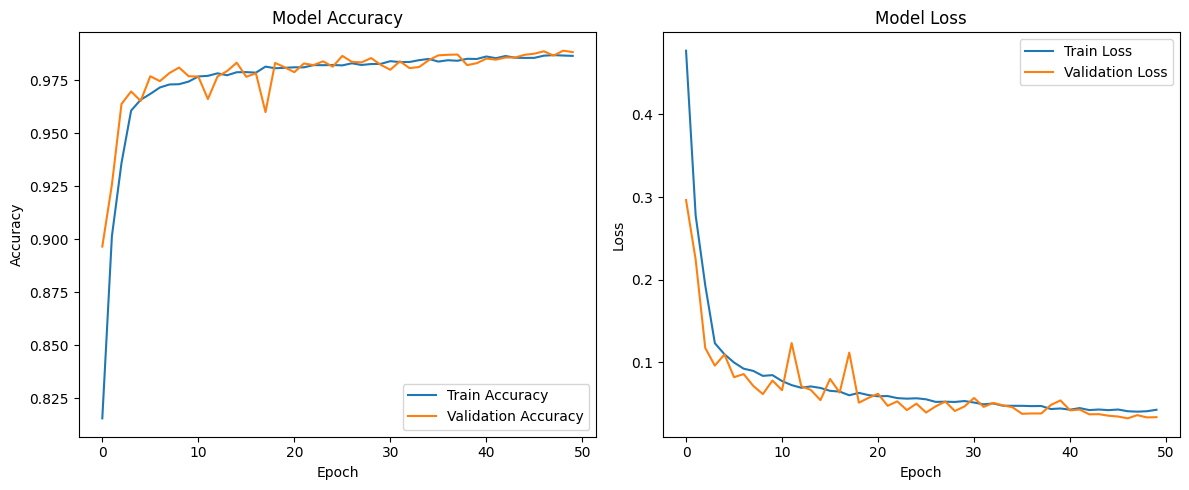

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [16]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the true labels from the one-hot encoded test set
true_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1592    0    0    0    3]
 [   3 1502    5    1   23]
 [   0    2 1858    0   15]
 [   0    0    0 2410    0]
 [   3    9   56    1 2279]]


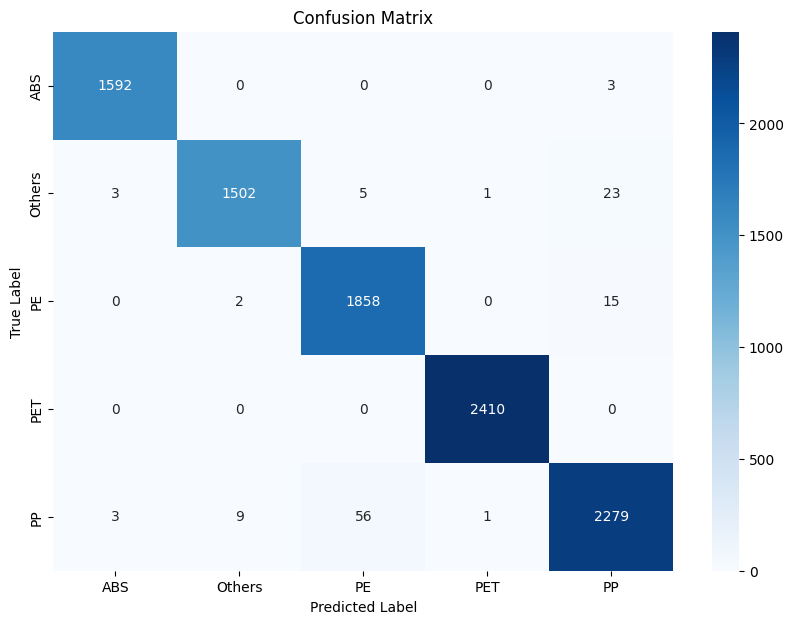

In [18]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


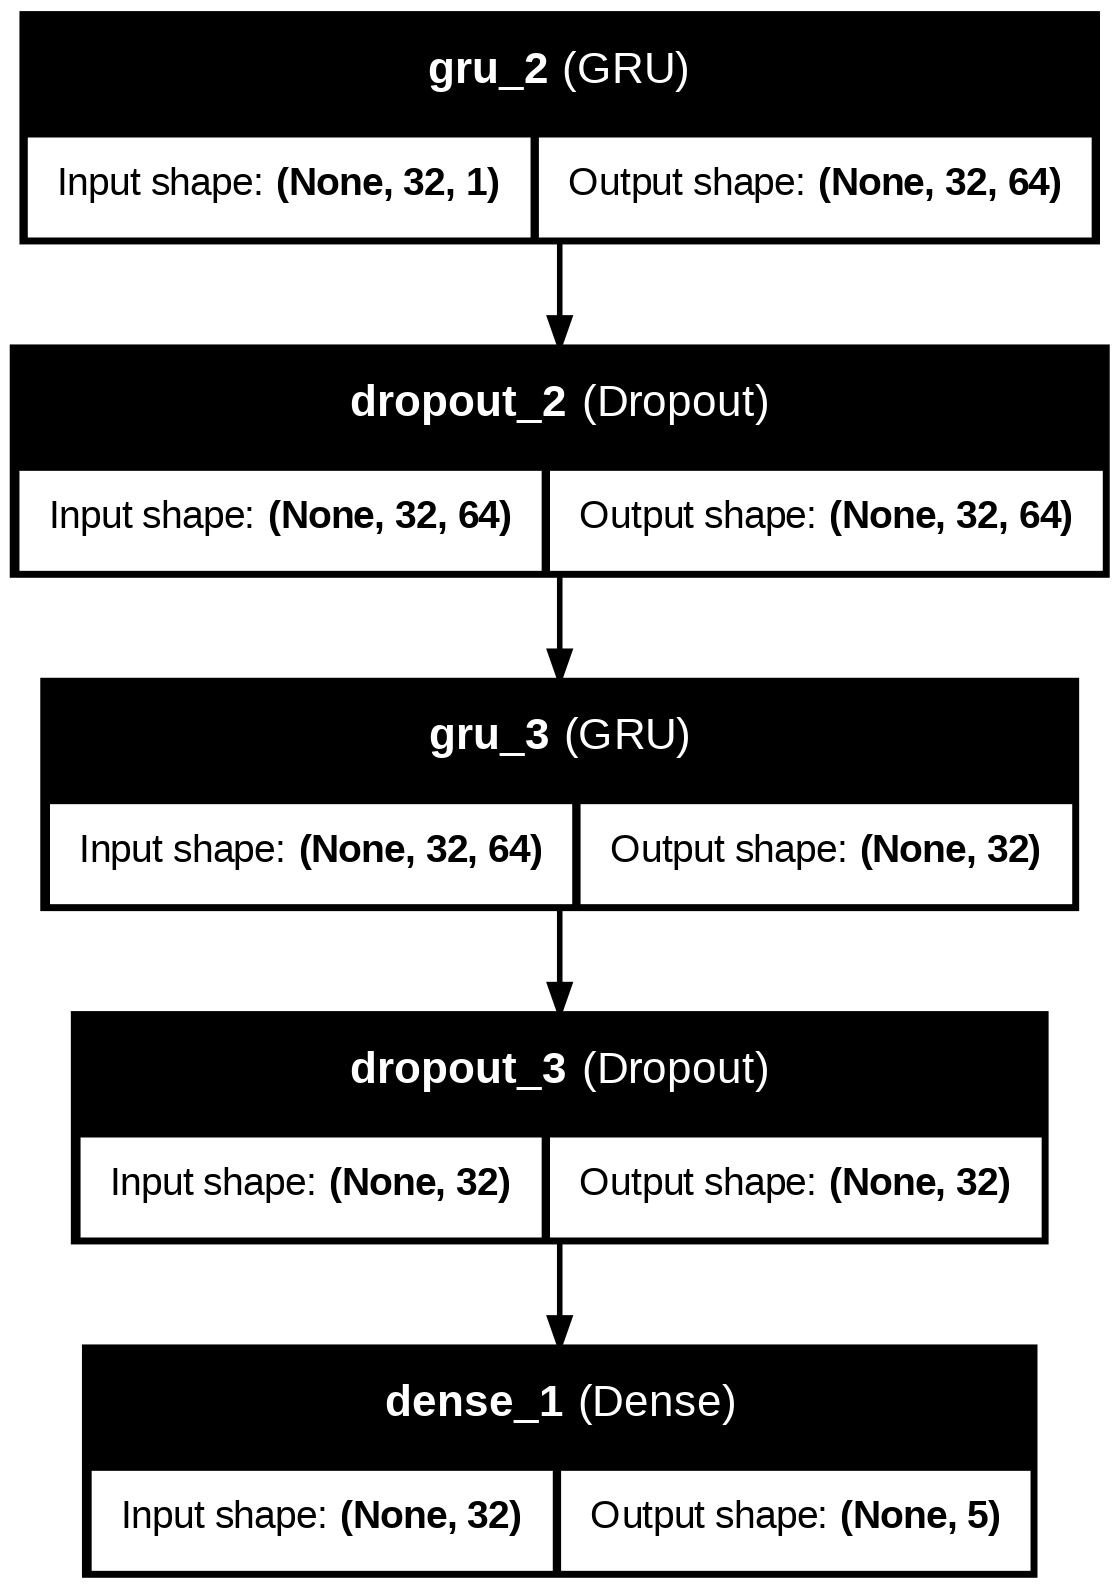

In [19]:
#model architecture
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='gru_model.png', show_shapes=True, show_layer_names=True)


In [25]:
# Save the model
model.save('gru_model.h5')


In [26]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('gru_model.h5')


In [27]:
# Assuming new_data is your new spectral data for prediction
pp_data = pd.read_csv('/content/test_pp_bl_alca.csv')
pp_data_reshaped = np.expand_dims(pp_data, axis=2)  # Reshape for RNN input

# Make predictions
predictions = loaded_model.predict(pp_data_reshaped)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Convert predicted class indices back to labels
predicted_labels = label_encoder.inverse_transform(predicted_classes)

print("Predicted Labels:", predicted_labels)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
Predicted Labels: ['Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'PP'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'PP' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'PP'
 'Others' 'PP' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others' 'Others'
 'Others'

Label
PET       11985
PP        11859
PE         9111
ABS        8067
Others     7788
Name: count, dtype: int64


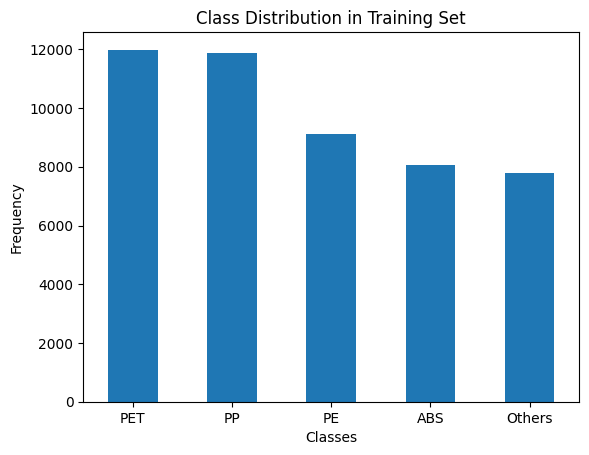

In [32]:
import matplotlib.pyplot as plt

# Assuming your labels are in a column named 'labels'
class_distribution = data['Label'].value_counts()

# Print the class distribution
print(class_distribution)

# Plot the class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.show()
